# Mini-Nerdle Solver Test
We prove (by brute-force) that you can always solve mini-Nerdle in at most $6$ guesses. The worst start having repeating numbers and thus less information, e.g. `10-5=5`. The best start has all different numbers: `56/7=8`, which needs at most $4$ guesses and $3.38 \pm 0.52$ guesses.

In [129]:
%load_ext autoreload
%autoreload 2

import collections
import itertools
import numpy as np
import matplotlib.pyplot as plt

import nerdle
import util
from nerdle import Hint, NerdleData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
# Mini-Nerdle.
NUM_SLOTS = 6
SCORE_DICT_FILE = "mini_nerdle.pickle"

solver_data = nerdle.get_solver_data(NUM_SLOTS, SCORE_DICT_FILE)

In [133]:
d = solver_data.score_dict
print(len(d), len(solver_data.answers))
for key in list(d.keys())[:10]:
    print(key, "".join(map(str, key[0])) + "=" + str(key[1]), len(d[key]))

206 206
4*3=12 4=* 206
8*4=32 8=* 206
12/6=2 1=2 206
15-6=9 1=5 206
11-5=6 1=1 206
4+7=11 4=+ 206
6+6=12 6=+ 206
10-3=7 1=0 206
7+3=10 7=+ 206
6*9=54 6=* 206


In [134]:
score = nerdle.score_guess("54/9=6", "4*7=28")
print(score)
print(util.score_to_hints(score, NUM_SLOTS) == [Hint.INCORRECT, Hint.MISPLACED, Hint.INCORRECT, Hint.INCORRECT, Hint.MISPLACED, Hint.INCORRECT])

520
False


In [136]:
# For each initial guess, calculate the distribution of #guesses required to get the answer, over all answers.
# This takes ~1.3s / initial guess = 4.5 min total.
num_guesses = np.array([
    [len(nerdle.NerdleSolver(solver_data).solve(answer, initial_guess=start)[1]) for answer in solver_data.answers]
    for start in solver_data.answers
])

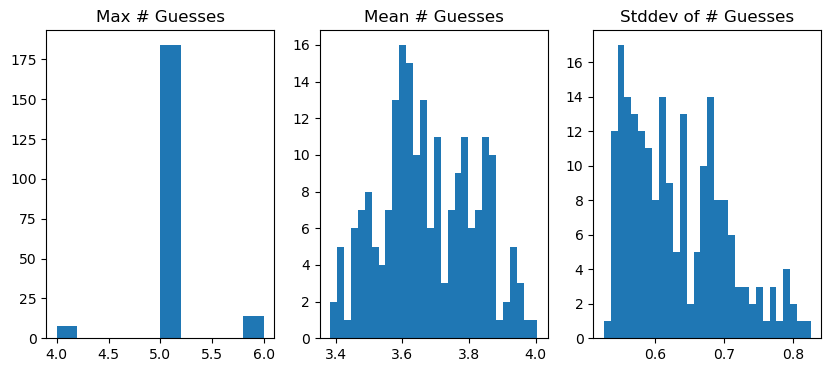

In [137]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

ax = axs[0]
ax.hist(np.max(num_guesses, axis=1))
ax.set_title("Max # Guesses")

ax = axs[1]
ax.hist(np.mean(num_guesses, axis=1), 30)
ax.set_title("Mean # Guesses")

ax = axs[2]
ax.hist(np.std(num_guesses, axis=1), 30)
ax.set_title("Stddev of # Guesses");

In [170]:
# Best starts.
worst_num_guesses = np.max(num_guesses, axis=1)
print("Min (max # guesses)", min(worst_num_guesses))
idx = np.where(worst_num_guesses == min(worst_num_guesses))[0]
print(idx)
best_starts = np.array(solver_data.answers)[idx]

print("Best starts", best_starts)
mean_best = np.mean(num_guesses[idx], axis=1)
mean_best_argmin = np.argmin(mean_best)
print("Best mean # guesses among those {} mean # guesses {:.2f} +- {:.2f} idx {}".format(
    solver_data.answers[idx[mean_best_argmin]], mean_best[mean_best_argmin], np.std(num_guesses[idx[mean_best_argmin]]),
    idx[mean_best_argmin]))

# Worst starts.
print("Max (max # guesses)", max(worst_num_guesses))
idx = np.where(worst_num_guesses == max(worst_num_guesses))[0]
print(idx)
worst_starts = np.array(solver_data.answers)[idx]

print("Worst starts", worst_starts)

Min (max # guesses) 4
[ 79  80 136 137 152 153 161 177]
Best starts ['27/3=9' '27/9=3' '56/7=8' '56/8=7' '63/7=9' '63/9=7' '7*8=56' '8*7=56']
Best mean # guesses among those 56/7=8 mean # guesses 3.38 +- 0.52 idx 136
Max (max # guesses) 6
[  5  23  27  30  48  49  64  84  99 122 129 138 142 148]
Worst starts ['10-5=5' '12-6=6' '12/2=6' '12/6=2' '15/3=5' '15/5=3' '2*6=12' '3*5=15'
 '36/6=6' '5*3=15' '5+5=10' '6*2=12' '6*6=36' '6+6=12']


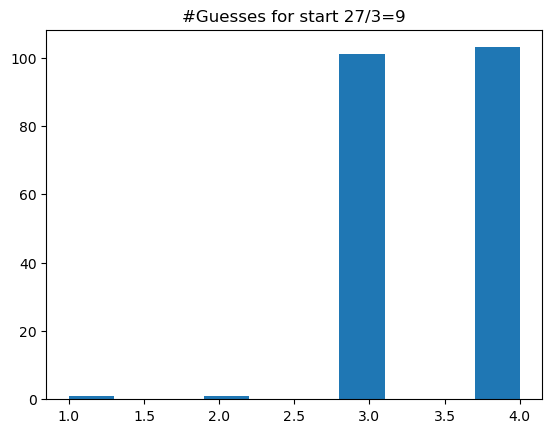

In [167]:
# Every initial guess' distribution of #guesses has to have a single "1" value.
start = best_starts[0]
n = np.array([len(nerdle.NerdleSolver(solver_data).solve(answer, initial_guess=start)[1]) for answer in solver_data.answers])
plt.hist(n);
plt.title("#Guesses for start {}".format(start));